In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat



In [2]:
#loading the data 

df_species = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name = 0)

df_sites = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name = 1)

df_observations = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name = 2)




In [12]:
#removing empty columns
del df_species["Unnamed: 0"]
del df_species["Unnamed: 1"]

df_species.columns = ["French Name", "Latin Name", "Origin"]
df_species.loc[len(df_species)] = ['Aigrette bleue', 'Egretta caerulea', 'Migrateur']

# ligne à ajouter (elle est prise pour les noms des colonnes au chargement)
# ['Aigrette bleue', 'Egretta caerulea', 'Migrateur']


del df_sites["Unnamed: 0"]
del df_sites["Unnamed: 1"]

# removing the first line containing the names of the columns
df_sites.drop(0, inplace = True) 

# Renaming the columns names for sites 
df_sites.columns = ["Transect", "X","Y","Type","Site","Site2"]

#removing the name and the department code for the observations and the distance of visualizations
# to make more space
df_observations = df_observations[["Nom transect", "date", "1er, 2e ou 3e passage", 
                "nuages","pluie","vent","visibilité","N° point","heure début",
                "ESPECE"]]


KeyError: 'Unnamed: 0'

In [ ]:

df_observations

,Nom transect,date,"1er, 2e ou 3e passage",nuages,pluie,vent,visibilité,N° point,heure début,ESPECE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,06:20:00,Sucrier à ventre jaune
3,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,06:20:00,Sporophile cici
4,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,06:20:00,Colibri falle-vert
...,...,...,...,...,...,...,...,...,...,...
114492,Post-Colon,2025-05-01 00:00:00,1.0,2,1.0,1.0,1.0,10.0,08:45:00,Sporophile rougegorge
114493,Post-Colon,2025-05-01 00:00:00,1.0,2,1.0,1.0,1.0,10.0,08:45:00,Saltator gros-bec
114494,Post-Colon,2025-05-01 00:00:00,1.0,2,1.0,1.0,1.0,10.0,08:45:00,Sucrier à ventre jaune
114495,Post-Colon,2025-05-01 00:00:00,1.0,2,1.0,1.0,1.0,10.0,08:45:00,Viréo à moustaches


In [13]:
df_sites

,Transect,X,Y,Type,Site,Site2
1,Aéroport,714593,1614233,Mangrove,S1,SIPI
2,Aéroport,714416,1614194,Mangrove,S1,S1P2
3,Aéroport,714133,1614141,Mangrove,S1,S1P3
4,Aéroport,713914,1614103,Mangrove,S1,S1P4
5,Aéroport,713719,1614062,Mangrove,S1,S1P5
...,...,...,...,...,...,...
646,Bois Pothau,723470,1626744,Agricole,S65,S65P6
647,Bois Pothau,723445,1626828,Agricole,S65,S65P7
648,Bois Pothau,723427,1626945,Forêt sèche,S65,S65P8
649,Bois Pothau,723481,1627061,Forêt sèche,S65,S65P9


In [14]:
# Descrbing the tables dimensions

def describe(df, df_name):
    print("Description of ",df_name)
    nLines, nColums = df.shape
    print("Number of lines :",nLines)
    print("Number of columns :",nColums)
    print("Columns names :  ", " - ".join(df.keys()))
    print("")

describe(df_species, "df_species")
describe(df_sites, "df_sites")
describe(df_observations, "df_observations")



Description of  df_species
Number of lines : 87
Number of columns : 3
Columns names :   French Name - Latin Name - Origin

Description of  df_sites
Number of lines : 650
Number of columns : 6
Columns names :   Transect - X - Y - Type - Site - Site2

Description of  df_observations
Number of lines : 114497
Number of columns : 10
Columns names :   Nom transect - date - 1er, 2e ou 3e passage - nuages - pluie - vent - visibilité - N° point - heure début - ESPECE



In [15]:
#Describing

print(f"There are {len(df_sites["Transect"].unique())} differents transects.")

print(f"There are {len(df_sites["Type"].unique())} differents types of transects.")

print("")
print(f"There are {len(df_species)} differents species")

# let's check each transect has 10 points

numberPoints = {i: 0 for i in df_sites["Transect"].unique()}

for val in df_sites["Transect"]:
    numberPoints[val] += 1

flag = True

for transect in numberPoints:
    if numberPoints[transect] != 10:
        print(f"Transect {transect} has {numberPoints[transect]} points")
        flag = False

if flag :
    print("Every transect has 10 points.")





There are 65 differents transects.
There are 7 differents types of transects.

There are 87 differents species
Every transect has 10 points.


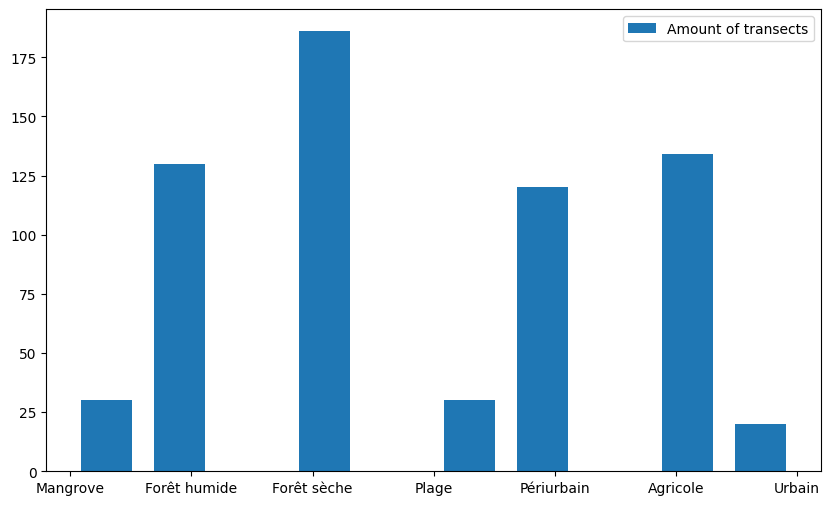

In [16]:

plt.figure(figsize = (10, 6))

n, bins, patches = plt.hist(df_sites["Type"], label = "Amount of transects", rwidth  = 0.7)



plt.legend()
plt.show()

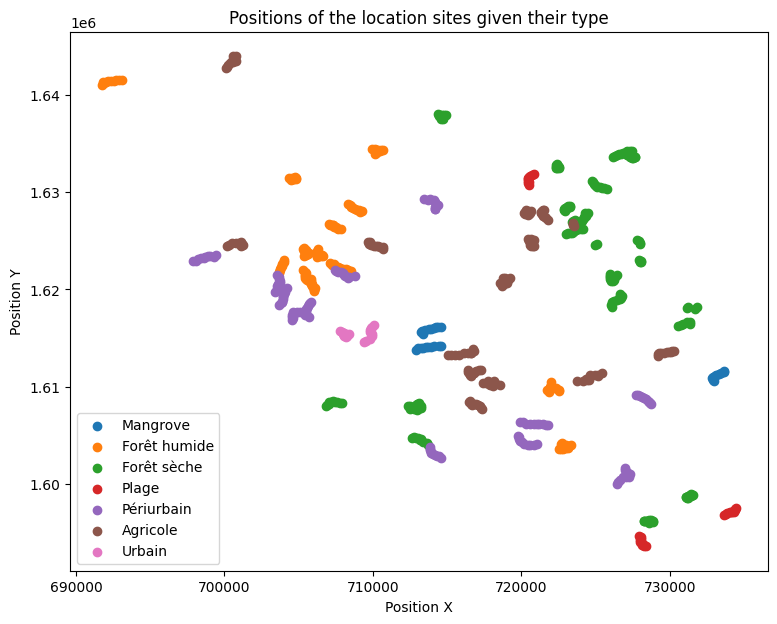

In [17]:

# Plotting the transects
import matplotlib
plt.figure(figsize = (9, 7))


locationTypes = df_sites["Type"].unique()


cmap = matplotlib.colormaps.get_cmap('tab10')

for i, t in enumerate(locationTypes):
    group = df_sites[df_sites["Type"] == t]
    plt.scatter(group["X"], group["Y"], label = t, color = cmap(i))

plt.title("Positions of the location sites given their type")
plt.xlabel("Position X")
plt.ylabel("Position Y")
plt.legend()
plt.savefig("figures/positions.jpeg")
plt.show()


In [18]:
# Now let's vectorize columns in the observations

#for i, specie in enumerate(df_species["French Name"]):
#    df_observations.loc[df_observations["ESPECE"] == specie, "ESPECE"] = i


def cast_as_float(x):
    if x == " " or x == np.nan:
        return np.nan
    else:
        return float(x)
df_observations["nuages"] = df_observations["nuages"].apply(cast_as_float)



In [79]:

def plot_distribution(ax, x, xlabel, ylabel, title):
    Nbins = len(x.unique())
    length = len(x)
    counts, bins, patches = ax.hist(x)


    for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
        x = (bin_left + bin_right) / 2
        y = count
        label = f"{(100*count / length):.3f}"
    
        if y > 0:
            ax.text(x, y, label+ "%", ha = 'center', va='bottom')

    for i, patch in enumerate(patches):
        patch.set_facecolor(cmap(i / len(patches)))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    


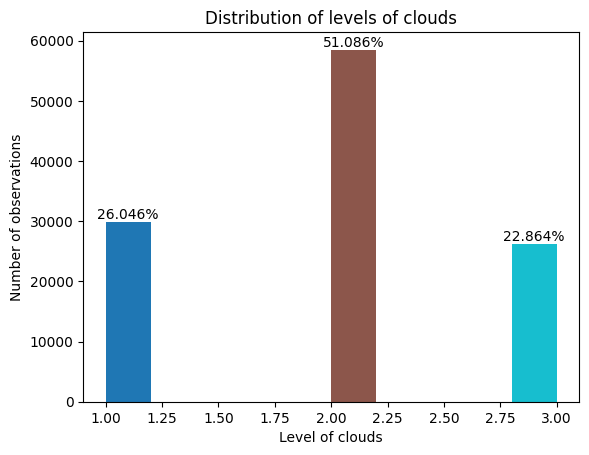

In [80]:
fig, ax = plt.subplots()

plot_distribution(ax, df_observations["nuages"], "Level of clouds", "Number of observations", "Distribution of levels of clouds" )
plt.savefig("figures/cloudLevel.jpeg")


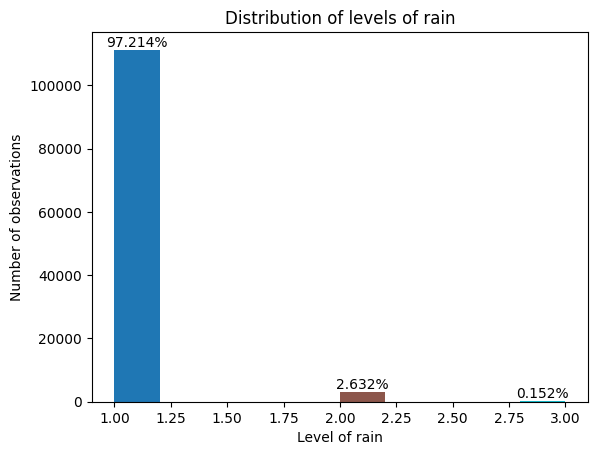

In [81]:
fig, ax = plt.subplots()
plot_distribution(ax,df_observations["pluie"], "Level of rain", "Number of observations", "Distribution of levels of rain" )
plt.savefig("figures/rainLevel.jpeg")

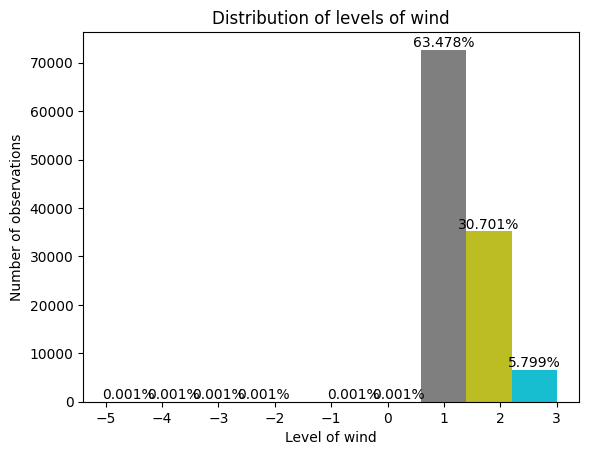

In [82]:
fig, ax = plt.subplots()
plot_distribution(ax, df_observations["vent"], "Level of wind", "Number of observations", "Distribution of levels of wind" )
plt.savefig("figures/windLevel.jpeg")


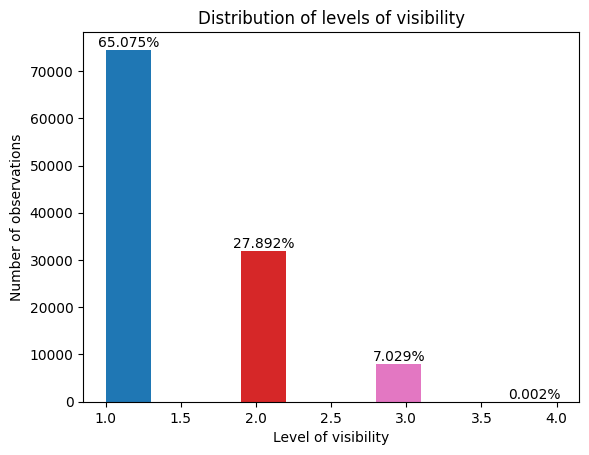

In [83]:
fig, ax = plt.subplots()
plot_distribution(ax, df_observations["visibilité"], "Level of visibility", "Number of observations", "Distribution of levels of visibility" )
plt.savefig("figures/visibilityLevel.jpeg")


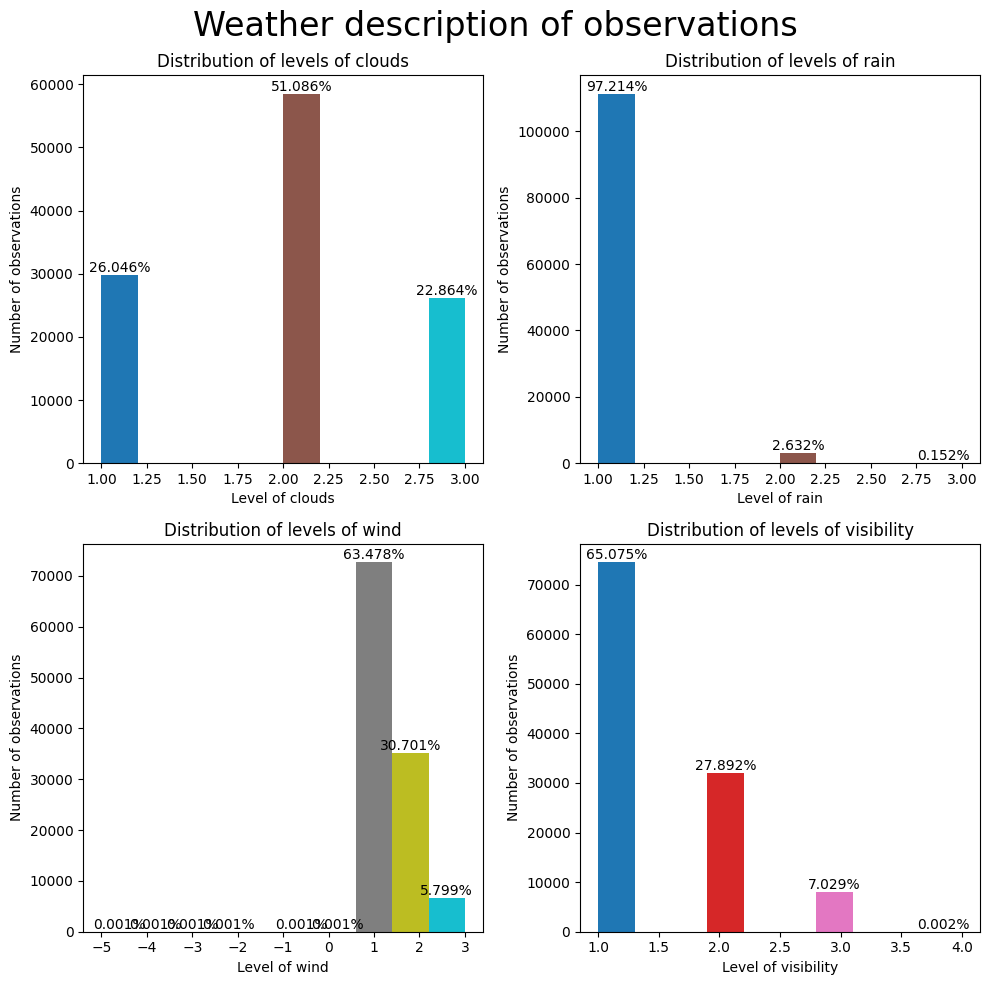

In [106]:
#now lets's show all of it on one figure

fig, axes = plt.subplots(2, 2, figsize = (10, 10))
fig.suptitle("Weather description of observations", fontsize = 24)


plot_distribution(axes[0, 0], df_observations["nuages"], "Level of clouds", "Number of observations", "Distribution of levels of clouds" )

plot_distribution(axes[0, 1],df_observations["pluie"], "Level of rain", "Number of observations", "Distribution of levels of rain" )

plot_distribution(axes[1, 0], df_observations["vent"], "Level of wind", "Number of observations", "Distribution of levels of wind" )

plot_distribution(axes[1, 1], df_observations["visibilité"], "Level of visibility", "Number of observations", "Distribution of levels of visibility" )


plt.tight_layout()
plt.savefig("figures/weather.jpeg")
plt.show()